[*********************100%***********************]  1 of 1 completed


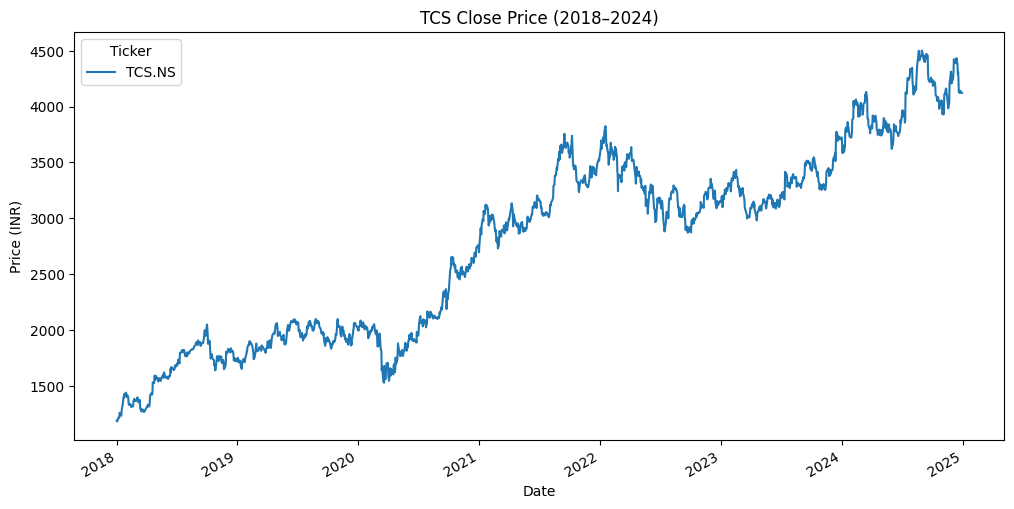

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")
tcs=yf.download('TCS.NS',start='2018-01-01',end='2024-12-31')
tcs=tcs[['Close']]
tcs.dropna(inplace=True)
tcs['Close'].plot(figsize=(12,6),title="TCS Close Price (2018–2024)")
plt.ylabel("Price (INR)")
plt.show()


                                     SARIMAX Results                                      
Dep. Variable:                             TCS.NS   No. Observations:                 1726
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -8734.316
Date:                            Tue, 15 Jul 2025   AIC                          17478.633
Time:                                    09:59:05   BIC                          17505.822
Sample:                                         0   HQIC                         17488.699
                                           - 1726                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8501      0.124     -6.874      0.000      -1.093      -0.608
ma.L1          0.8742      0.115   

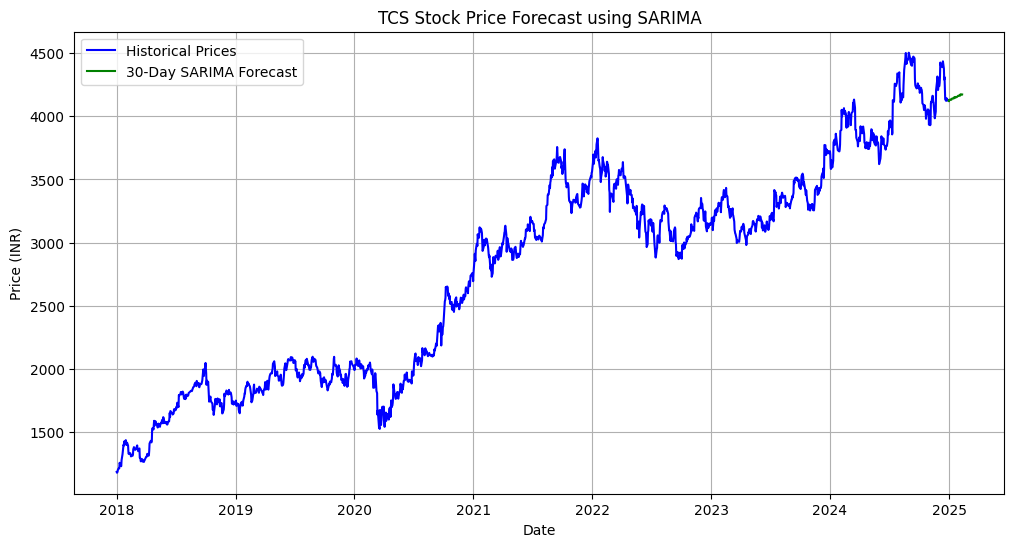

In [4]:
sarima_model=SARIMAX(tcs['Close'],
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1,12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_results=sarima_model.fit()
print(sarima_results.summary())
forecast_steps=30
sarima_forecast=sarima_results.get_forecast(steps=forecast_steps)
forecast_index=pd.date_range(start=tcs.index[-1]+pd.Timedelta(days=1),periods=forecast_steps,freq='B')
forecast_values=sarima_forecast.predicted_mean
forecast_values.index=forecast_index
plt.figure(figsize=(12,6))
plt.plot(tcs['Close'],label='Historical Prices', color='blue')
plt.plot(forecast_values,label='30-Day SARIMA Forecast',color='green')
plt.title("TCS Stock Price Forecast using SARIMA")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.grid()
plt.show()
